<a href="https://colab.research.google.com/github/rogernogueira/camp/blob/main/N%C3%A3oSupervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris




In [25]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.rename(columns={'target': 'especies'}, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


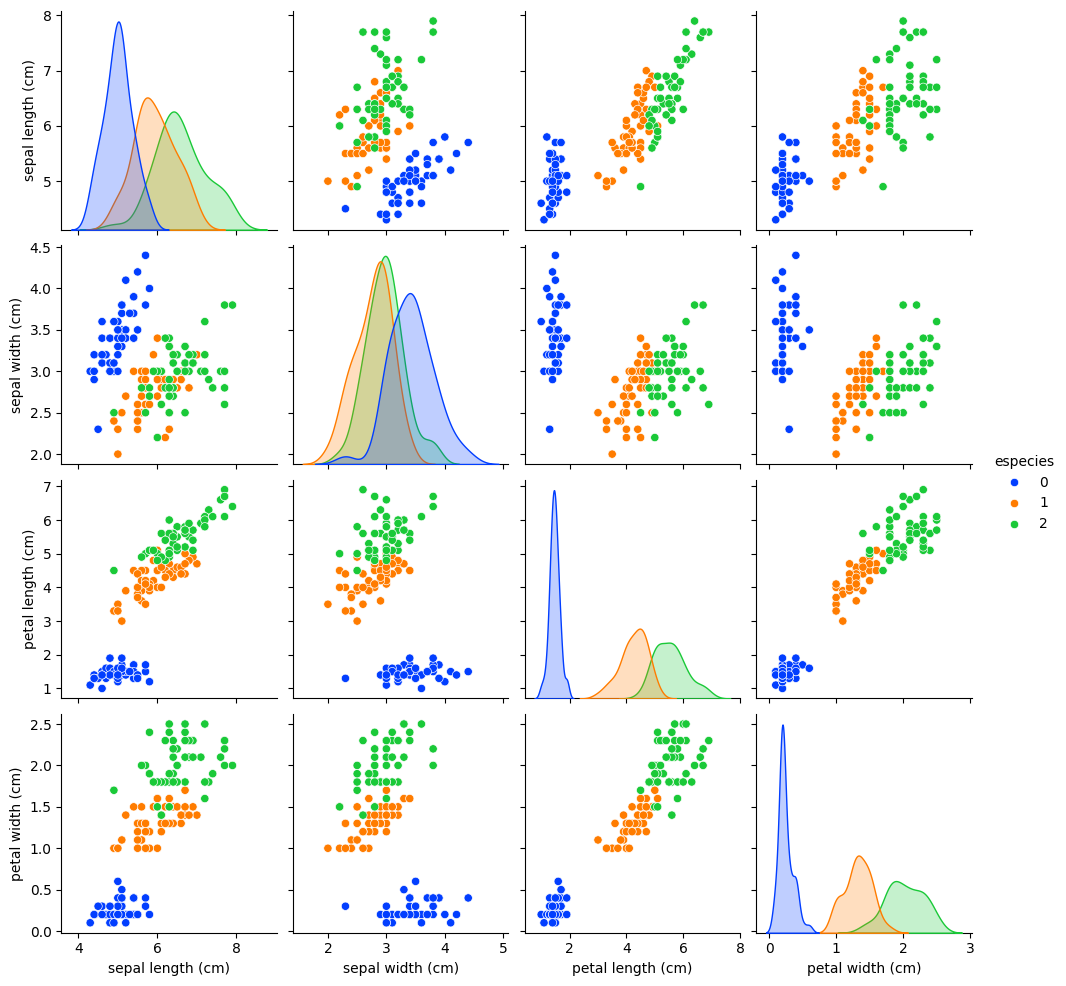

In [26]:
sns.pairplot(df, hue='especies', palette='bright')

In [14]:
model = KMeans(n_clusters=3,  random_state = 42)
model.fit(df.iloc[:, :-1])

KMeans(n_clusters=3, random_state=42)

In [15]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [16]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [17]:
df['cluster'] = model.labels_


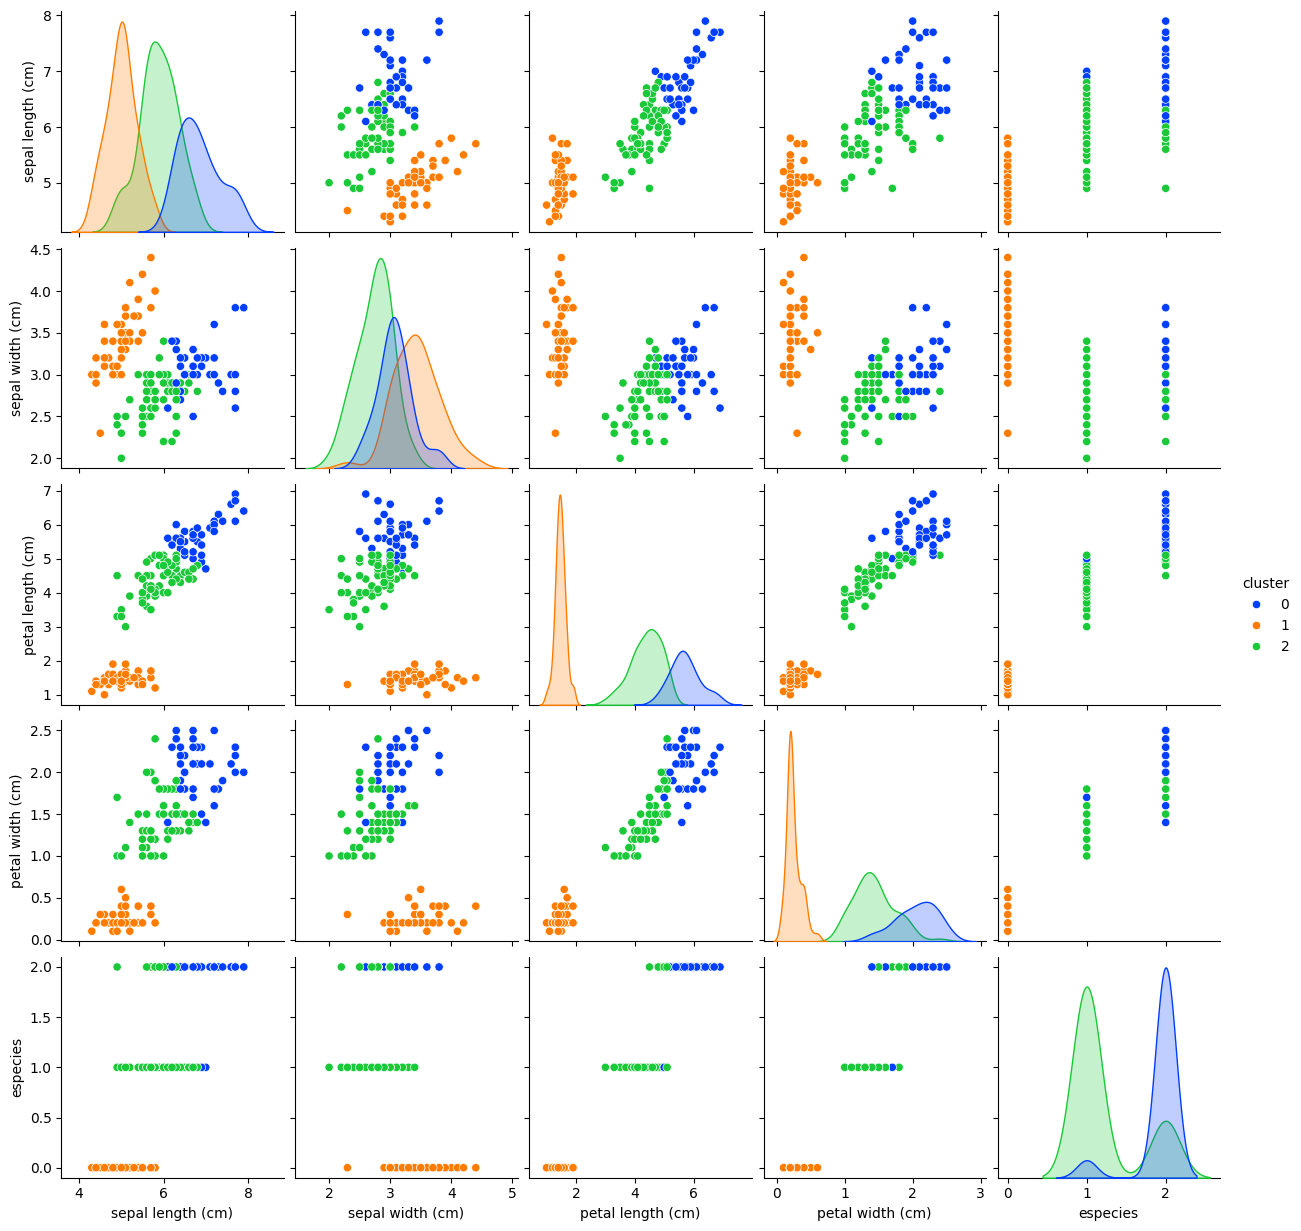

In [19]:
sns.pairplot(df, hue='cluster', palette='bright')

In [27]:
df['especies'].value_counts()

,count
especies,
0,50
1,50
2,50


In [28]:
df['especies'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.shape  = df.especies.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies,nome
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [33]:
df['nome'] = df['especies'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

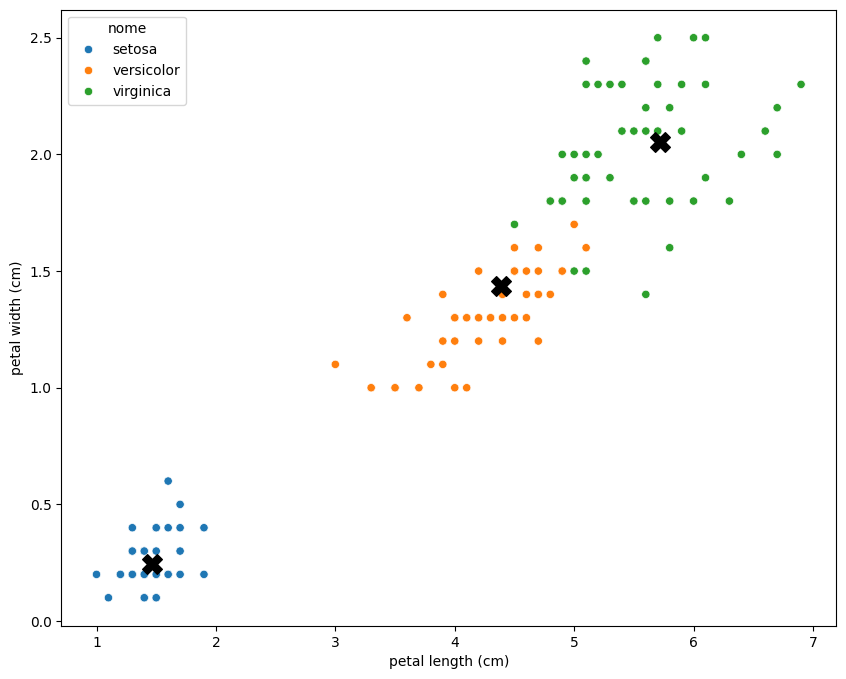

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='nome', data=df)
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], c='black', marker='X', s=200)

In [51]:
model_dbs = DBSCAN(eps=0.5, min_samples=5 )

In [52]:
model_dbs.fit((df.iloc[:, :-2]))

DBSCAN()

In [53]:
clusters = model_dbs.labels_

In [54]:
df["clusters"] = clusters

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

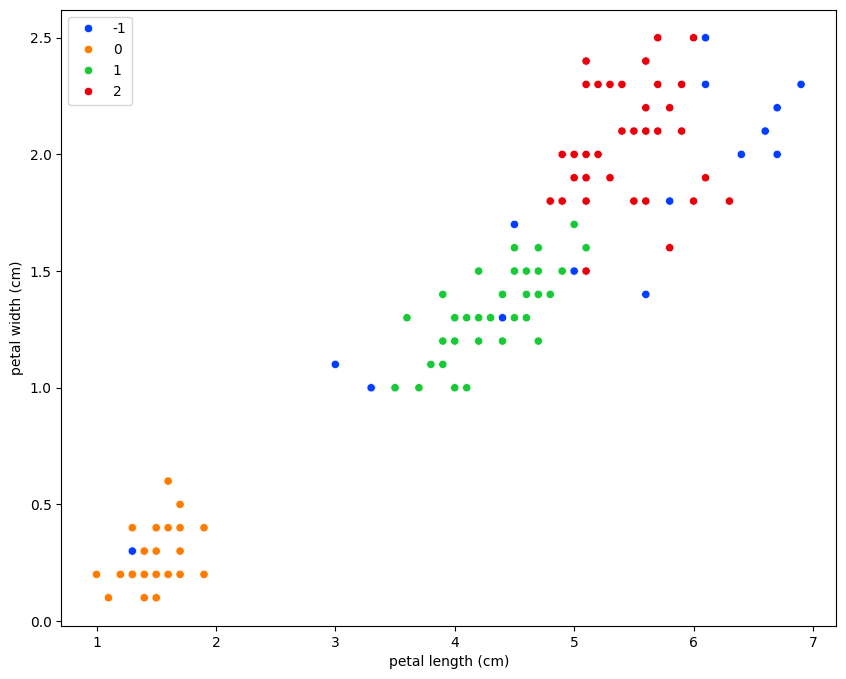

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=clusters, data=df, palette='bright')
